<a href="https://colab.research.google.com/github/Manversajjad/Multivariate-Data-Analysis---II/blob/main/Multivariate_Data_Analysis_stub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multivariate Data Analysis for Qualitative Information

## Getting starting

Let's import the libraries required for Python to run Seaborn.

*   *Numpy* is a library for working with arrays and matrices in Python
*   *Pandas* is a library for data analysis and manipulation. Pandas makes it easy to manipulate data files.
*   *Matplotlib* is a library for visualizing data. This library is the basis for Seaborn, but Seaborn is more convenient.
*    *[Seaborn](https://seaborn.pydata.org/)* provides high-level commands for plots and data exploration based on the Matplotlib packages. Although much of the functionality is the same as the  raw Matplotlib commands,  Seaborn is much more convenient.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
plt.style.use('classic')
%matplotlib inline


Seaborn comes with a number of datasets already included in the library. Use the get_dataset_names() function to see a list of the available datasets.

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

## Loading the Tips Dataset




Let's use the "tips" dataset. Tips has categorical and numeric data, which will allow us to show multiple different types of charts. Plus, as we start, we want to use a smaller dataset for examples. The following two lines load the tips dataset and print the first five lines.

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Remember how to examine the numerical fields in the tips dataset with describe(). The **count** row shows the number of rows in the dataset, and we can see that there are 244 rows total.

In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Loading the Diamonds Dataset


We will use the "diamonds" dataset as your practice dataset. Diamonds is a larger dataset with both categorical and numeric data.

In this dataset, each record representations a diamond. *price* is the price in US dollars. The *carat* is the weight of the diamond. *cut* is the quality of the cut. *color* is the diamond colour, and it ranges from J (worst) to D (best). *clarity* is a measurement of how clear the diamond is, ranging from I1 (worst) to IF (best). *x* is the length in mm, *y* is the width in mm, and *z* is the depth in mm.

In [ ]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Heatmaps

Heatmaps are used to understand the cross-frequency counts in two different qualitative variables. However, the data must be aggregated before plotting the heatmap. To get the data in the right format, let's create a pivot_table in Python.

### Pivot Tables

Pivot tables allow you to change the format from long to wide using the pivot_table() function. The index value is the variable that you want for the rows. The columns argument contains the variable that will become the field, and the values argument is the value for the cells. The aggfunc argument denotes how those values will be aggregated at the level of the index/column.

For instance, the code below shows that the values of the day field will be the rows (Thurs, Fri, Sat, Sun). The columns will be the values of the time field (Lunch, Dinner). Within this 4x2 data frame, each cell will have the mean of the total_bill for that combination of time and day.

In [ ]:
tips_heatmap = pd.pivot_table(tips,  index=['day'], columns=['time'], values='total_bill', aggfunc=np.mean)
tips_heatmap.head()

time,Lunch,Dinner
day,,
Thur,17.664754,18.780000
Fri,12.845714,19.663333
Sat,NaN,20.441379
Sun,NaN,21.410000


*Q: Why do you think we see NaN for some combinations of day/time?*

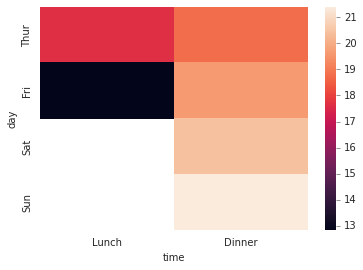

In [ ]:
ax = sns.heatmap(data=tips_heatmap)

#### Color maps

Color maps are the way to change the palette for heatmaps, and the related argument is cmap.

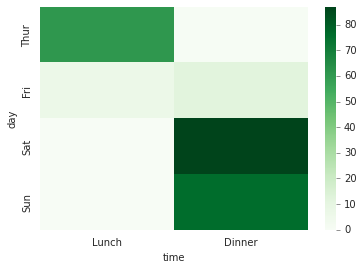

In [ ]:
# create a new dataset with the count of the bills
tips_heatmap_count = pd.pivot_table(tips, values='total_bill', index=['day'], columns=['time'], aggfunc=len, fill_value=0)
ax = sns.heatmap(data=tips_heatmap_count, cmap="Greens")

#### Annotate Heat maps

Heatmaps also have an argument to annotate the cells with the data labels.

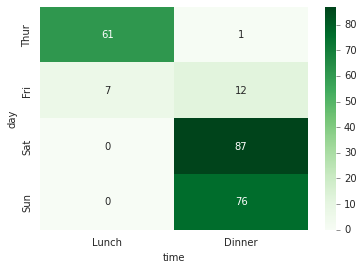

In [ ]:
tips_heatmap_count = pd.pivot_table(tips, values='total_bill', index=['day'], columns=['time'], aggfunc=len, fill_value=0)
ax = sns.heatmap(data=tips_heatmap_count, cmap="Greens", annot=True)

#### Exercise (Diamonds data)

Using the diamonds data, plot the heatmap of the mean price by the clarity and the color of the diamonds.

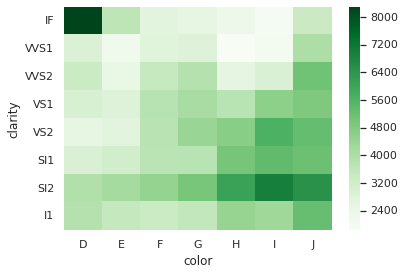

In [ ]:
diamonds_heatmap = pd.pivot_table(diamonds,  index=['clarity'],
                                  columns=['color'],
                                  values='price',
                                  aggfunc=np.mean)
diamonds_heatmap.head()
ax = sns.heatmap(data=diamonds_heatmap, cmap="Greens")

## Multivariate Data Analysis for Quantitative Information

There are several options for multivariate analysis of quantitative information.



### Scatterplots

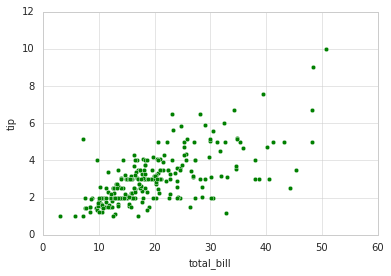

In [ ]:
ax = sns.scatterplot(data=tips, x="total_bill", y="tip", color="green")

#### Exercise (Diamonds data)

Using the diamonds data, plot the relationship between the carat and price variables.

### Regression Plots
In seaborn, regression plots are a different function from a basic scatterplot.

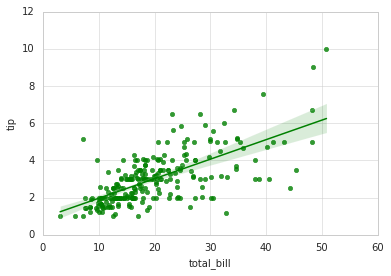

In [ ]:
ax = sns.regplot(data=tips, x="total_bill", y="tip", color="green")

#### Exercise (Diamonds data)

Plot the regression between the carat and price in the diamonds data.

### Two-dimensional Histogram



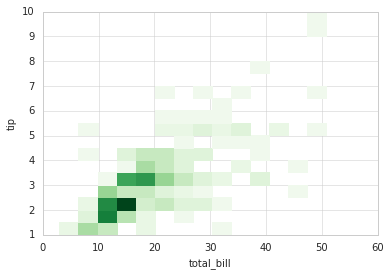

In [ ]:
ax = sns.histplot(data=tips, x="total_bill", y="tip", cmap="Greens")

#### Exercise (Diamonds data)

Plot the two-dimensional histogram of the carat and price variables.

### Pairplot for all Quantitative Fields

The pairplot explores the relationship between all the numeric fields in a dataset. For different fields, the pairplot produces a scatterplot of the two variables. For the diagonals, the pairplot produces a distribution plot for the single variable, which is a histogram by default.

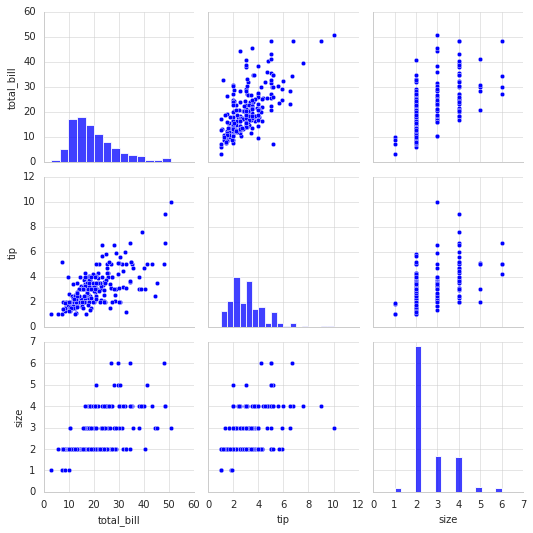

In [ ]:
ax = sns.pairplot(data=tips)

#### Exercise (Diamonds data)

Plot the pairplot of the quantitative variables.

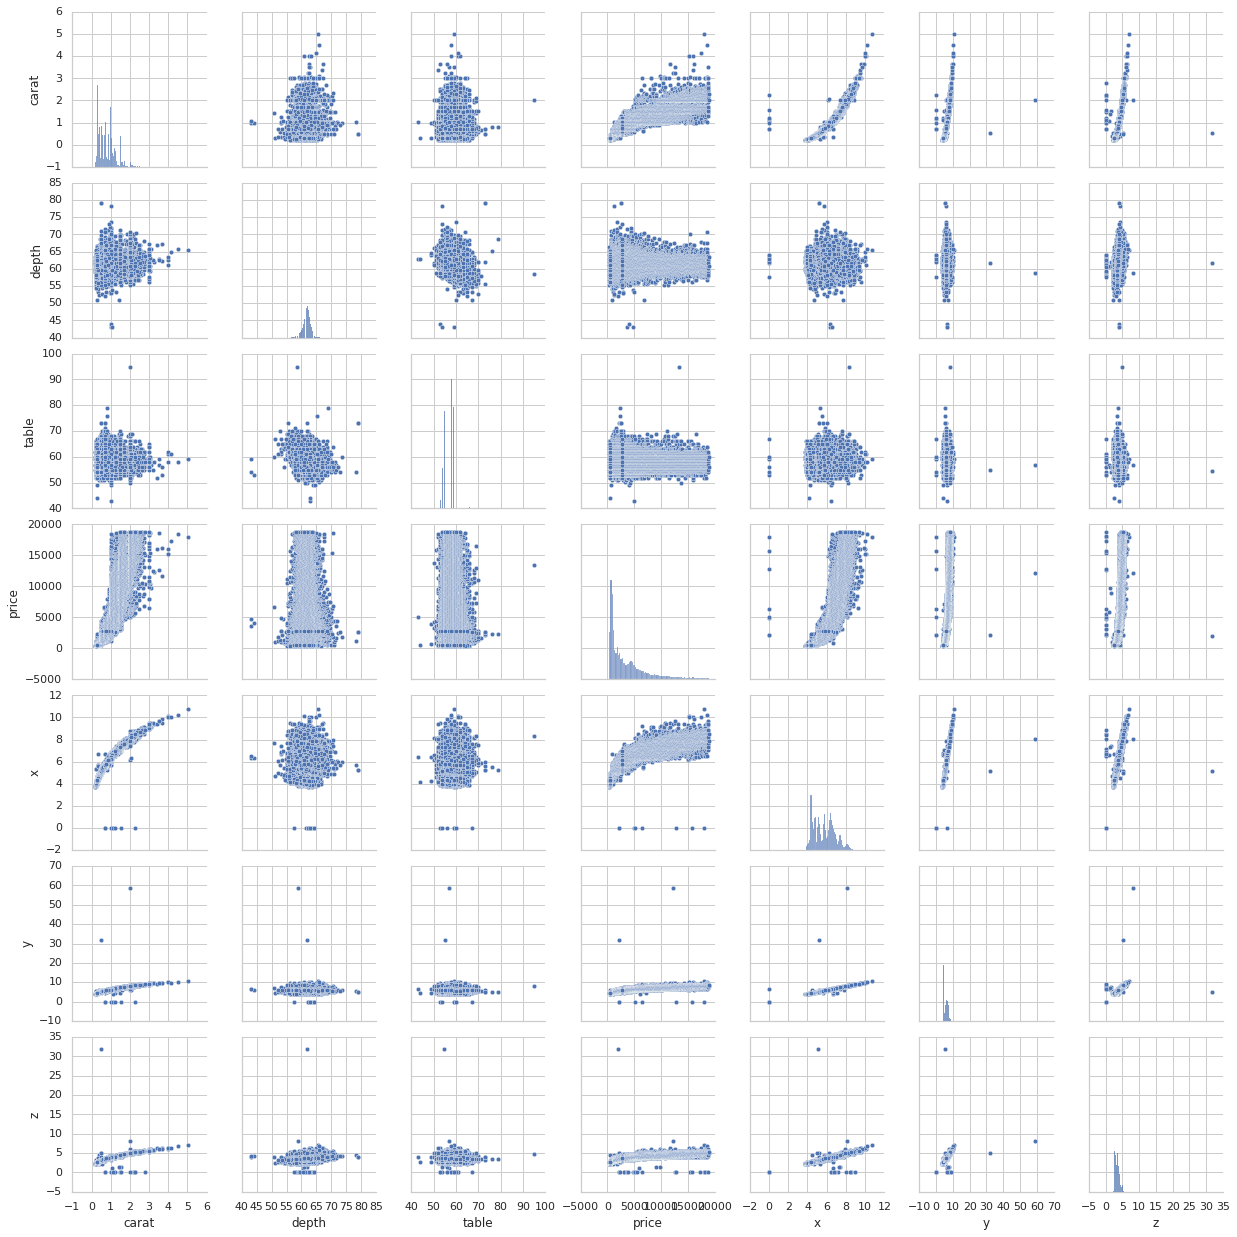

In [ ]:
ax = sns.pairplot(data=diamonds)

### Joint Plot for Quantitative Fields

The joint plot shows the scatterplot of two variables in the main plot. A histogram with the distribution of each variable is on the axes.

More information about jointplot() and its arguments is available in the [documentation](http://seaborn.pydata.org/generated/seaborn.jointplot.html).



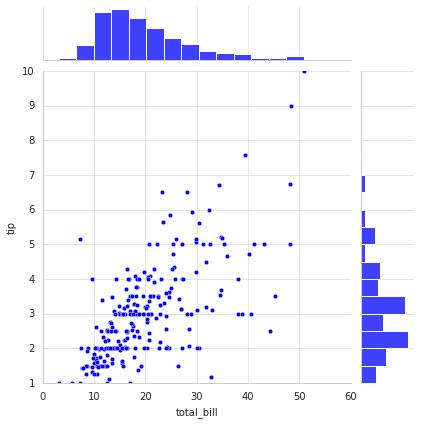

In [ ]:
ax = sns.jointplot(data=tips, x="total_bill", y="tip")

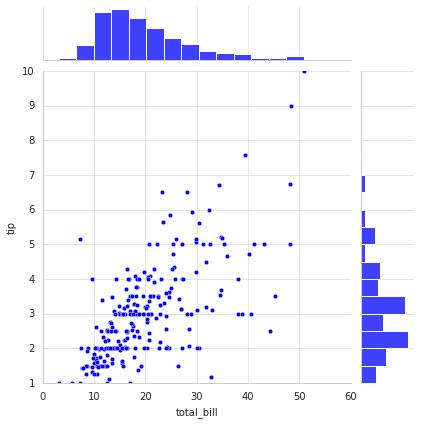

In [ ]:
sns.axes_style('white')
g = sns.jointplot(x="total_bill", y="tip", data=tips)
#g.ax_joint.plot(np.linspace(0, 10), np.linspace(0, 5), ':k')
plt.show(g)

There are arguments to change the details of the plot. The marker argument changes the marker. The height/ratio changes the ratio of the marginal plots to the main plot.

In [ ]:
sns.jointplot(
    data=tips, x="total_bill", y="tip",
    marker="x",
    marginal_kws=dict(bins=25, fill=True),
    height=5, ratio=2,
     marginal_ticks=True
)
plt.show()

NameError: ignored

### Correlations (Diamonds data)

Correlation matrices are heatmaps in which the tiles are shaded by their correlation.

Let's calculate the correlation. Then we put it into a data set and then use a color palette with different colors for positive and negative values.

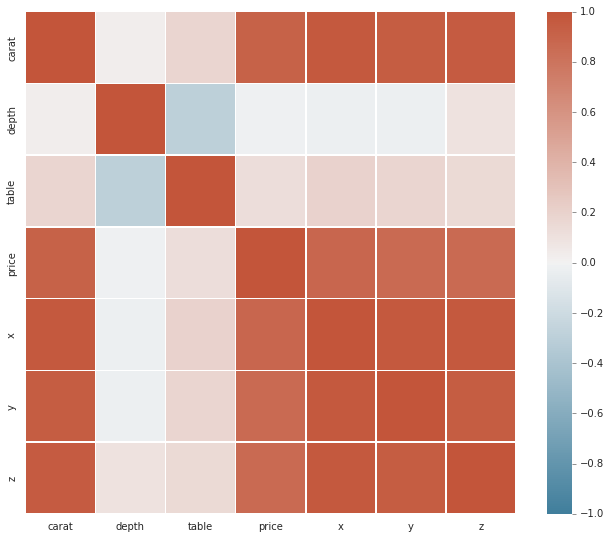

In [ ]:
corr = diamonds.corr()

#mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, linewidths=0.5, center=0, vmax=1, vmin=-1)
plt.show()

It is possible to show only half of the triangle with correlation matrix.

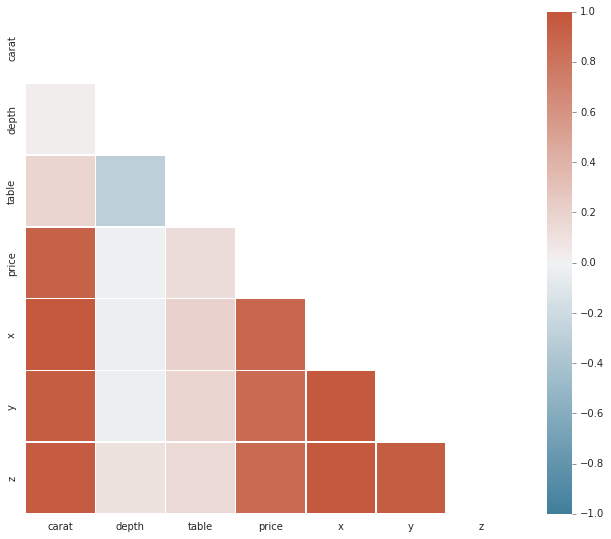

In [ ]:
corr = diamonds.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=0.5,
            center=0, vmax=1, vmin=-1)
plt.show()

The center, vmax, and vmin arguments are critical to making the meaningful color palette. Without these arguments, the color palette will be in the middle on the range. By comparison, examine the correlation matrix without the center and vmax arguments. Notice that the neutral color, white, is about 0.3.

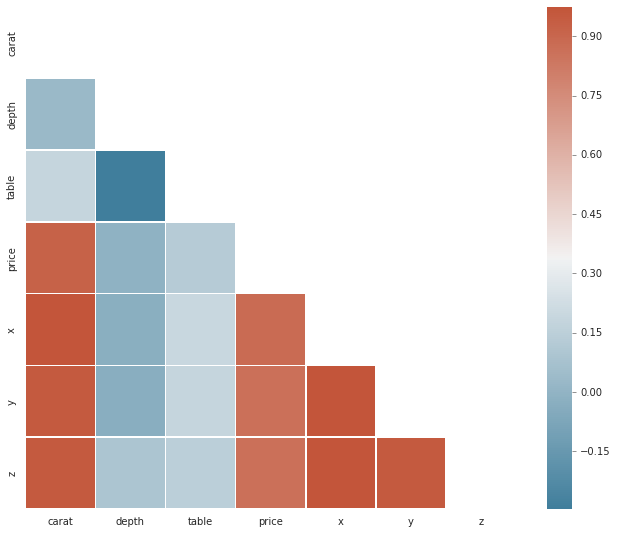

In [ ]:
corr = diamonds.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=0.5)
plt.show()

## Categorical and Numeric

### Basic Bar Chart

Let's discuss how to make a basic bar plot. Bar charts in Seaborn do not necessarily require pre-processing the data, unlike R or Excel.

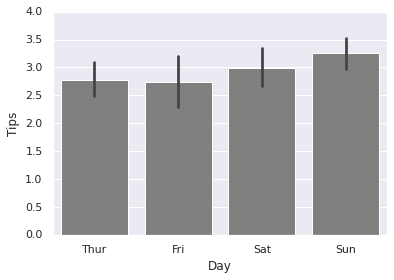

In [ ]:
sns.set()
b1 = sns.barplot(x="day", y="tip", data=tips, color="grey")
b1.set(xlabel="Day", ylabel="Tips")
plt.show()

In [ ]:
ax = sns.barplot(x='day', y='tip', data=tips)

NameError: ignored

#### Exercise (Diamonds data)

Plot the bar chart with the cut by the price

### Side-by-side Bar Charts

Side-by-side bar charts show the subcategories within a particular category. Seaborn contains a [tutorial](https://seaborn.pydata.org/generated/seaborn.barplot.html) on making side-by-side bar plots using the *hue* argument.

It is also possible to use the formatting argument to change the axis labels to a currency format.

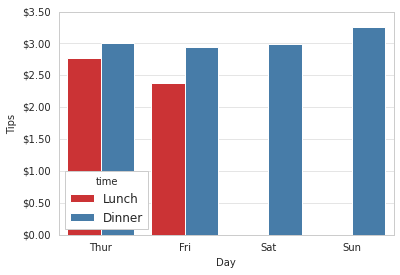

In [ ]:
b2 = sns.barplot(x="day", y="tip", hue="time", palette="Set1", data=tips, ci=False)
b2.set(xlabel="Day", ylabel="Tips")

yfmt = '${:,.2f}'
ytick = mtick.FuncFormatter(lambda x, pos: yfmt.format(x))
b2.yaxis.set_major_formatter(ytick)
plt.show(b2)

The legend can also be placed according to the data. Redoing the above chart, we can move the legend so that it is outside of the panel area.

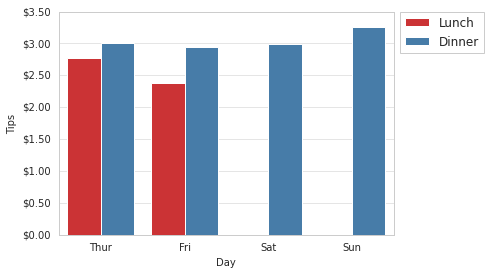

In [ ]:
b2 = sns.barplot(x="day", y="tip", hue="time", palette="Set1", data=tips, ci=False)
b2.set(xlabel="Day", ylabel="Tips")

yfmt = '${:,.2f}'
ytick = mtick.FuncFormatter(lambda x, pos: yfmt.format(x))
b2.yaxis.set_major_formatter(ytick)

# Putting the legend at the bottom
#plt.legend(loc='bottom center')

# Putting the legend outside the panel area with a value greater than 1
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Putting the legend outside the panel area with a value greater than 1
#plt.legend(bbox_to_anchor=(0.1, -0.1), loc='upper left', borderaxespad=0)

plt.show(b2)

#### Exercise (Diamonds data)

Plot a side-by-side bar of the cut and the color with the mean price on the y-axis.

### Strip plot

The strip plot shows the points, and another plot with the conditional mean for each value is layered on top of the strip plot.

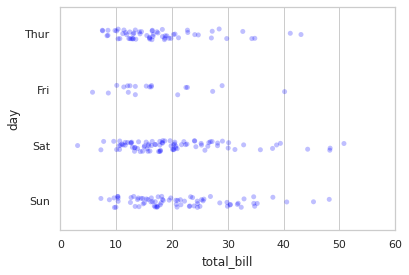

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="total_bill", y="day",
                   data=tips,
                   alpha=.25, color="blue")

plt.show()

#### Subcategories

The strip plot can include subcategories for the high-level categories by using the *hue* argument.

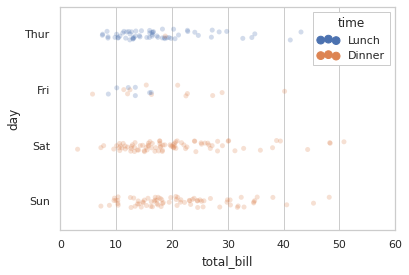

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="total_bill", y="day",
                   hue="time",
                   data=tips,
                   alpha=.25)

plt.show()

#### Offseting the points

The dodge= argument creates an offset for the points in the different categories.

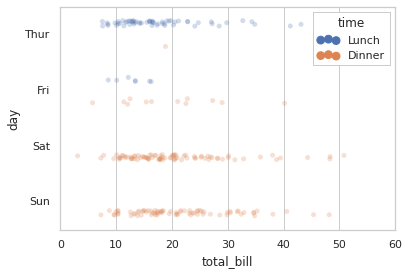

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="total_bill", y="day",
                   hue="time",
                   data=tips,
                   dodge=True,
                   alpha=.25)

#### Layering plots

The next step is to add the conditional means to the plot as an additional layer on top of the strip plot. The dodge

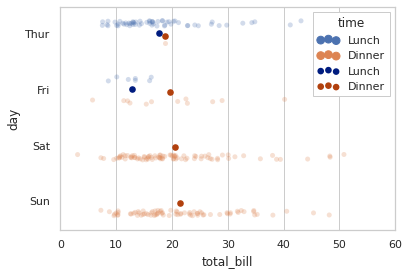

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="total_bill", y="day", hue="time",
              data=tips, dodge=True, alpha=.25)

ax = sns.pointplot(x="total_bill", y="day", hue="time",
              data=tips,
              dodge=.6 - .6 / 3, # This is the default width for two points
              #dodge=True,
              join=False,  # do not connect or join the points together
              palette="dark",
              markers="o",
              scale=.75, ci=None, estimator=np.mean)

plt.show()

#### Legends

The legends include the stripplot and pointplot markers by default. To collapse the legends and just choose the first two markers, get the legend handles using ax.get_legend_handles_labels() function and then choosing the later two items in the list.

The legend() function also has an argument, ncol, for the number of columns within the legend box.

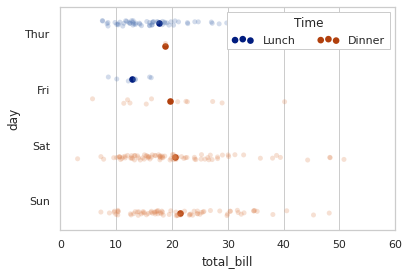

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="total_bill", y="day", hue="time",
              data=tips, dodge=True, alpha=.25)

ax = sns.pointplot(x="total_bill", y="day", hue="time",
              data=tips,
              dodge=.6 - .6 / 3, # This is the default width for two points
              #dodge=True,
              join=False,  # do not connect or join the points together
              palette="dark",
              markers="o",
              scale=.75, ci=None, estimator=np.mean)

# Getting the legend handles and choosing only two items for the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], labels[2:], title="Time",
          loc="upper right", ncol=2, frameon=True)
plt.show()

#### Exercise (Diamonds data)

Create a strip plot of the price by the color with the conditional means.

### Categorical Boxplots

Categorical boxplots show the conditional distribution based on values of the categorical value.

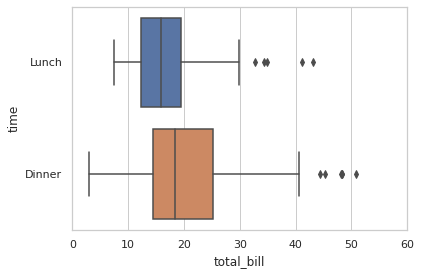

In [ ]:
ax = sns.boxplot(x="total_bill", y="time", data=tips)

#### Exercise (Diamonds data)

Plot the price by the diamond cut for the diamonds data.

### Categorical Density Plots

Categorical density plots are another way to show the conditional distribution based on the values of the categorical variable.

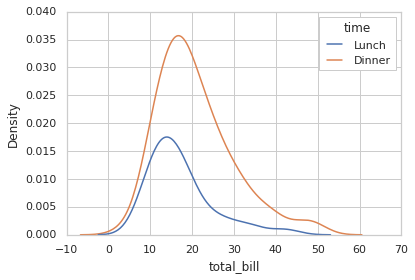

In [ ]:
ax = sns.kdeplot(x="total_bill", hue="time", data=tips)

#### Cumulative Density

Categorical density plots are another way to show the conditional distribution based on the values of the categorical variable. The cumulative argument shows the cumulative distribution by the values of the categorical variables.

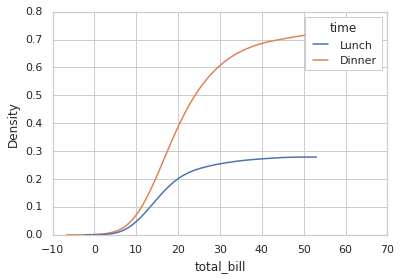

In [ ]:
ax = sns.kdeplot(x="total_bill", hue="time", data=tips, cumulative=True)

#### Exercise (Diamonds data)

Plot the cumulative density of the price variable by the cut variable. What does it mean?

## Temporal and Numeric

### Line Charts

The most basic plot for time series data is the line chart. The basic function for line charts in Seaborn is sns.lineplot().

In [ ]:
line1 = sns.lineplot(data=flights, x="year", y='passengers')

line1 = sns.lineplot(data=flights, x="month", y="passengers")
line1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
line1 = sns.lineplot(data=flights, x="year", y='passengers', hue="month")

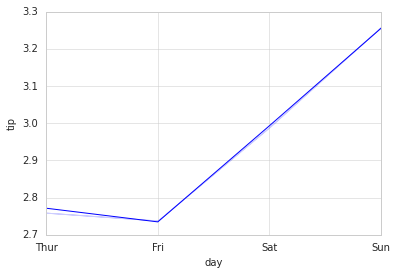

In [ ]:
line1 = sns.lineplot(x="day", y="tip", data=tips, ci=False)
plt.show(line1)

By adding the *hue* argument, we can compare the distribution over time across groups.

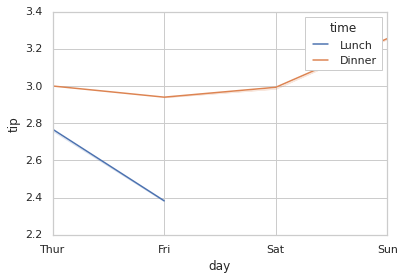

In [ ]:
line1 = sns.lineplot(x="day", y="tip", hue="time", data=tips, ci=False)
plt.show(line1)

## Aesthetics: Set the theme and color palettes

Seaborn allows detailed control over the color, theme, estimator, and other chart attributes.

*Theme*

Here are some examples of setting the theme using the set() function. https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme


*Color*

Here are some examples of color palettes.
https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

*Estimator*

It's easy to change the aggregation function with *estimator* argument.

*Title*

Change the vertical location of the suptitle() with the y argument.

*Legend*

Change the location of the legend with the plt.legend() function.

*Change the tick labels*

Use set_xticklabels() to manually change the names of the values on the x-axis. Use a list to make the names.



In [ ]:
import matplotlib.ticker as mtick
sns.set(palette="husl", style = "whitegrid") #rc={'figure.figsize':(10.7,7.27)},

# Showing the line chart
line1 = sns.lineplot(data=flights, x="month", y="passengers", hue="year", ci=False, palette="Set1")

# Setting the axis ranges and labels
line1.set(ylim=(0,800), xlabel="Month", ylabel="Passengers")

# Adding the titles
plt.suptitle("Airline travel grew in the 1950s, particularly in summer.", fontsize=16)#, y=0.96)
plt.title("Source: Seaborn Flights Dataset", fontsize=12)

# Moving the legends
line1.legend(bbox_to_anchor=(1.25, 1 ), title='Year', loc='upper right', frameon=False)

plt.show(line1)

In [ ]:
### Explorating Additional Attributes with the Line Chart

### Exploring an Additional Attributes for a Regression Plot


### Change the color for regression plots

The scatter_kws and line_kws arguments enable you to color and style the points and the trend line in two differently.

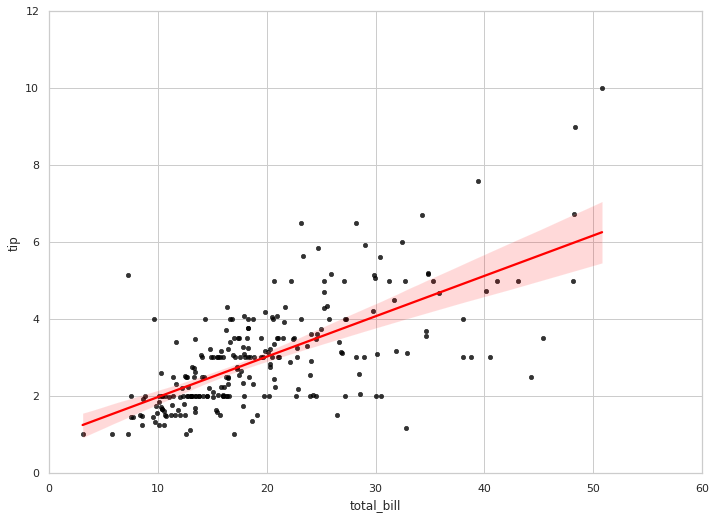

In [ ]:
# Showing the regression plot
s1 = sns.regplot(x="total_bill", y="tip", data=tips,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.show()

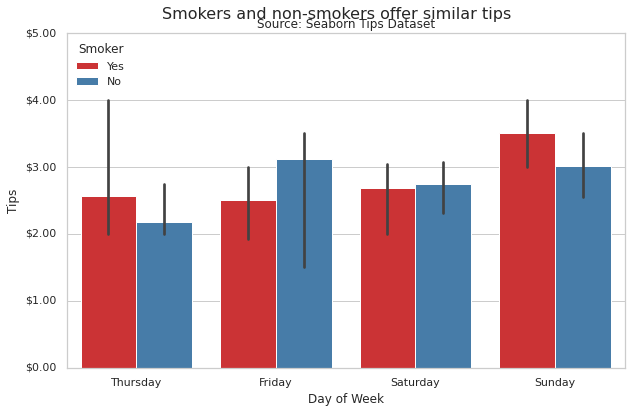

In [ ]:
import matplotlib.ticker as mtick

# Changing the style and theme
sns.set(rc={'figure.figsize':(10,6)}, palette="Set1", style = "whitegrid")

# Showing the barplot
bc2 = sns.barplot(x="day", y="tip", hue="smoker", data=tips, estimator=np.median)

# Setting the axis ranges and labels
bc2.set(ylim=(0,5), xlabel="Day of Week", ylabel="Tips")

# Adding the titles
plt.suptitle("Smokers and non-smokers offer similar tips", y=0.96,fontsize=16)
plt.title("Source: Seaborn Tips Dataset", fontsize=12)

# Moving the legend
plt.legend(title='Smoker', loc='upper left', frameon=False)

# Formatting the y-axis
yfmt = '${:,.2f}'
ytick = mtick.FuncFormatter(lambda x, pos: yfmt.format(x))
bc2.yaxis.set_major_formatter(ytick)

# Changing the labels for the tick marks on the x-axis
xlabels = ["Thursday", "Friday", "Saturday", "Sunday"]
bc2.set_xticklabels(xlabels)

plt.show(bc2)

## Examples


#### Example 1

Create a side-by-side bar chart of the total (sum) of the bills by meal (time field) and by day.

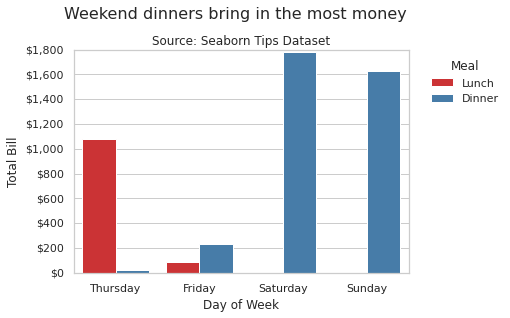

In [ ]:
e1 = sns.barplot(x="day", y="total_bill",
                 hue="time", data=tips,
                 estimator=np.sum,
                 palette = "Set1",
                 ci=False)

# Setting the axis ranges and labels
e1.set( xlabel="Day of Week",
       ylabel="Total Bill")

# Adding the titles
plt.suptitle("Weekend dinners bring in the most money",
             y=1.05, fontsize=16)
plt.title("Source: Seaborn Tips Dataset", fontsize=12)

# Moving the legend
plt.legend(title='Meal',
           bbox_to_anchor=(1.3, 1), frameon=False)

# Formatting the y-axis
yfmt = '${:,.0f}'
ytick = mtick.FuncFormatter(lambda x, pos: yfmt.format(x))
e1.yaxis.set_major_formatter(ytick)

# Changing the labels for the tick marks on the x-axis
xlabels = ["Thursday", "Friday", "Saturday", "Sunday"]
e1.set_xticklabels(xlabels)


plt.show()

#### Example 2

Create a strip plot of the tip amount by party size and meal time. Improve the look and feel of the chart by changing the colors, formatting the axes, etc.

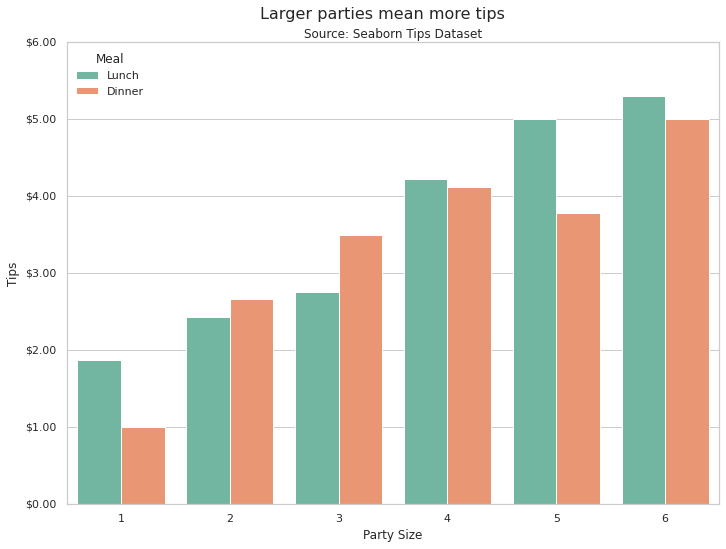

In [ ]:
e2 = sns.stripplot(data=tips, x="size",
                   y="tip", hue="time",
                   alpha=0.25)
sns.pointplot(data=tips, x="size",
              y="tip", hue="time",
              join=False,
              estimator=np.mean, ci=False)

# Setting the axis ranges and labels
e2.set( xlabel="Party Size", ylabel="Tips")

# Adding the titles
plt.suptitle("Larger parties mean more tips",
             y=1.05, fontsize=16)
plt.title("Source: Seaborn Tips Dataset",
          fontsize=12)

# Moving the legend
handles, labels = e2.get_legend_handles_labels()
e2.legend(handles[2:], labels[2:],
          title="Meal",
          loc="upper left", ncol=2,
          frameon=True)


# Formatting the y-axis
yfmt = '${:,.2f}'
ytick = mtick.FuncFormatter(
    lambda x, pos: yfmt.format(x))
e2.yaxis.set_major_formatter(ytick)

plt.show();p

#### Example 3
Here is another example of the side-by-side bar chart with improved aesthetics.  

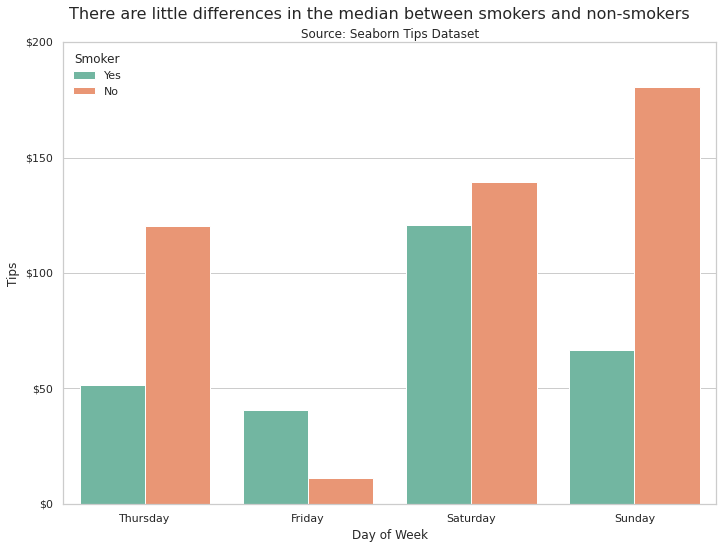

In [ ]:
# Changing the style and theme
sns.set(rc={'figure.figsize':(11.7,8.27)}, palette="Set2", style = "whitegrid")

# Showing the barplot with a different estimator
bc3 = sns.barplot(x="day", y="tip", hue="smoker", data=tips, estimator=np.sum, ci=False)

# Setting the axis ranges and labels
bc3.set( xlabel="Day of Week", ylabel="Tips") #ylim=(0,5),

# Adding the titles
plt.suptitle("There are little differences in the median between smokers and non-smokers", y=0.96, fontsize=16)
plt.title("Source: Seaborn Tips Dataset", fontsize=12)

# Moving the legend
plt.legend(title='Smoker', loc='upper left', frameon=False)

# Formatting the y-axis
yfmt = '${:,.0f}'
ytick = mtick.FuncFormatter(lambda x, pos: yfmt.format(x))
bc3.yaxis.set_major_formatter(ytick)

# Changing the labels for the tick marks on the x-axis
xlabels = ["Thursday", "Friday", "Saturday", "Sunday"]
bc3.set_xticklabels(xlabels)

plt.show(bc3)

## Wrapping up

Seaborn is a flexible tool to create data visualization plots. Check out the following resources for more information about the basic plot types.

**Pointplots**

For more information about using Seaborn to create pointplots, read the [documentation](https://seaborn.pydata.org/generated/seaborn.pointplot.html)


**Scatterplots**

For more information about using Seaborn to create scatterplots, read the [documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot).


**Regression plots**

For more information about using Seaborn for regression plots, read the [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot).


**Line charts**

For more information about using Seaborn for line plots, read the [documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=lineplot#seaborn.lineplot).


**Bar charts**

For more information about using Seaborn for bar charts, read the [documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot).

**Legend**
For more information about the legend, read the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


Furthermore, the Python Data Science Handbook section on [Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) has more information about using Seaborn to create visualizations.